In [13]:
# Import Dependencies

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
# Import Data

white_wine = pd.read_csv('white_wine_data_index.csv')
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [15]:
# Assign X (data) and y (target)

X = white_wine[['residual sugar', 'pH', 'alcohol']].values
y = white_wine["quality"].values.reshape(-1, 1)
print(X.shape, y.shape)

(4898, 3) (4898, 1)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
# Create a StandardScaler model and fit it to the training data

X_scaler = StandardScaler().fit(X_train.reshape(-1, 1))

In [19]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# K Nearest Neighbors

/Users/Cyrus/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


k: 1, Train/Test Score: 0.993/0.579
k: 2, Train/Test Score: 0.801/0.510
k: 3, Train/Test Score: 0.749/0.509
k: 4, Train/Test Score: 0.689/0.526
k: 5, Train/Test Score: 0.671/0.511
k: 6, Train/Test Score: 0.639/0.514
k: 7, Train/Test Score: 0.631/0.509
k: 8, Train/Test Score: 0.619/0.492
k: 9, Train/Test Score: 0.602/0.489
k: 10, Train/Test Score: 0.592/0.490
k: 11, Train/Test Score: 0.579/0.496
k: 12, Train/Test Score: 0.568/0.481
k: 13, Train/Test Score: 0.566/0.481
k: 14, Train/Test Score: 0.569/0.484
k: 15, Train/Test Score: 0.570/0.491
k: 16, Train/Test Score: 0.567/0.488
k: 17, Train/Test Score: 0.559/0.490
k: 18, Train/Test Score: 0.557/0.501
k: 19, Train/Test Score: 0.554/0.496
k: 20, Train/Test Score: 0.561/0.489
k: 21, Train/Test Score: 0.555/0.493
k: 22, Train/Test Score: 0.554/0.504
k: 23, Train/Test Score: 0.554/0.503
k: 24, Train/Test Score: 0.551/0.509
k: 25, Train/Test Score: 0.550/0.501
k: 26, Train/Test Score: 0.552/0.507
k: 27, Train/Test Score: 0.549/0.500
k: 28, Tra

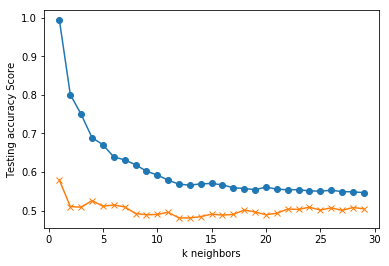

In [20]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 1), train_scores, marker='o')
plt.plot(range(1, 30, 1), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [21]:
# Note that k: 13 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)
print('k=18 Test Acc: %.3f' % knn.score(X_test, y_test))

k=18 Test Acc: 0.500


/Users/Cyrus/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


In [22]:
new_red_wine_data = [[0.2,3.53,14.5]]
predicted_class = knn.predict(new_red_wine_data)
print(predicted_class)

[7]
